In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %%
data = pd.read_csv(r"C:\Users\esenb\DATA\data.csv")

# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

In [12]:
#data["radius_worst"].head()

0    25.38
1    24.99
2    23.57
3    14.91
4    22.54
Name: radius_worst, dtype: float64

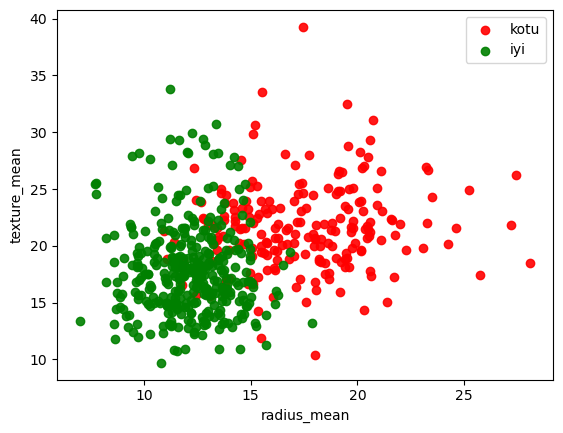

In [6]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [3]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [4]:
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

C:\Users\esenb\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\esenb\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\esenb\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [6]:
# %% SVM

from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  


GaussianNB()

In [7]:
# %% test
print("print accuracy of naive bayes algo: ",classifier.score(x_test,y_test))

print accuracy of naive bayes algo:  0.935672514619883


In [8]:
y_pred = classifier.predict(x_test)  
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[102,   6],
       [  5,  58]], dtype=int64)